In [146]:

##### Load libraries #####
import matplotlib.pyplot as plt
import cvxpy as cp
import numpy as np
from numpy.linalg import norm
## generat data

def dataset(num_points):
 np.random.seed(1234)
 X = np.random.randn(num_points, 2)
 Y_xor = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
 y = np.array([1 if i else -1 for i in Y_xor])
 print('Actual Label: \n', y)
 return X, y



In [147]:
######## Functions ########
# Kernel definition Gaussian 
def kernel(x, gamma): 
	return np.exp(-gamma*(norm(x)**2))

# Gamma Matrix computation

def gam_matrix(data, gamma , kernel):
	nr_data = data.shape[0]
	gam_matrix = np.array([kernel(data[i]-data[j],gamma) \
				               	 for i in range(nr_data) \
					             for j in range(nr_data)]) \
					             .reshape(nr_data,nr_data)
	return gam_matrix

# optimization SVM problems


def optmization_cv(data, gamma, kernel, gam_matrix, constantVal):
	# Quadratic of objective function part
	nr_data = data.shape[0] 
	P = np.outer(y,y)*gam_matrix(data, gamma , kernel)

	q = -1*np.ones(nr_data)

    # Constraints part
	G = -1*np.eye(nr_data, nr_data)
	N = np.eye(nr_data, nr_data)
	h = np.zeros(nr_data)
	k = constantVal*np.ones(nr_data)
   
	A = np.ones(nr_data)*y
	b = 0.0

	# Define and solve the CVXPY problem.
	x = cp.Variable(nr_data)
	problem = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T@x),
                 [G@x <= h,
				  N@x <= k,
                  A@x == b])
	problem.solve()

	print("The optimal value is: ", problem.value)
	print("A solution multipliers are: \n", x.value)

	# multipliers of dua-form SVM optimization 
	alpha = x.value
	alpha_positive = alpha[alpha>1.0e-8]
	support_vector = X[alpha>1.0e-8]
	support_vector_Y = y[alpha>1.0e-8]
	return alpha_positive, support_vector, support_vector_Y

# compute intercept

def compute_b(alfa, sup_x, sup_y, gamma):
	# retrieve multipliers (alpha)
	# support vector x
	# support vector y	
	intercept=0.0
	for I_X_DO in range(len(sup_x)):
		dummy = np.sum( (alfa[j]*sup_y[j]*kernel(sup_x[j]-sup_x[I_X_DO], gamma)) \
									for j in range(len(sup_x)) )
		dummy = sup_y[I_X_DO] - dummy
		intercept += dummy
	intercept = intercept/len(sup_x)
	return intercept


# Compute the accuracy of all training samples

def prediction(data,alpha,sup_vector_y,sup_vector,b):
	y_pred=np.zeros(data.shape[0])
	for I_X_DO in range(data.shape[0]):
		y_pred[I_X_DO]=np.sign(np.sum(( alpha[j]*sup_vector_y[j]\
						                *kernel(sup_vector[j]-data[I_X_DO], gamma) \
							            for j in range(len(sup_vector)) )) + b)
	return y_pred



In [148]:

# Constant value
constant_value1=1
constant_value2=1.5
constant_value3=2
gamma=0.5

# Data input

np.random.seed(0)
X = np.random.randn(26, 2)
Y_xor = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.array([1 if i else -1 for i in Y_xor ])
print('Actual Label: \n', y)

# support vectors x, y and multipliers
alpha1, sup_vector1, sup_vector_y1 = optmization_cv(X, gamma, kernel, gam_matrix, constant_value1)
alpha2, sup_vector2, sup_vector_y2 = optmization_cv(X, gamma, kernel, gam_matrix, constant_value2)
alpha3, sup_vector3, sup_vector_y3 = optmization_cv(X, gamma, kernel, gam_matrix, constant_value3)



Actual Label: 
 [-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1  1]
The optimal value is:  -14.517608299473952
A solution multipliers are: 
 [ 1.00000000e+00  3.63047828e-01 -2.53375902e-22  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  8.70907972e-01 -1.59348022e-22
  5.79749428e-01  1.00000000e+00  5.50477643e-24  1.00000000e+00
  9.50205650e-01  1.00000000e+00 -1.77935023e-22  1.00000000e+00
  3.08505077e-22  5.35977183e-01  1.00000000e+00  3.26618895e-01
  1.00000000e+00  1.00000000e+00]
The optimal value is:  -19.363477184938052
A solution multipliers are: 
 [ 1.50000000e+00  2.37658977e-01  6.74674067e-22  1.50000000e+00
  1.50000000e+00  9.94127539e-01  1.50000000e+00  1.50000000e+00
  1.50000000e+00  1.47024191e+00  1.10084129e+00 -9.54802274e-23
  4.18444759e-01  1.50000000e+00  6.11900729e-23  1.50000000e+00
  8.56389786e-01  1.50000000e+00 -7.05857130e-23  1.50000000e+00
 -1.2496

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Predicted Label: 
 [-1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1. -1.  1.]
Predicted Label: 
 [-1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1. -1.  1.]
Predicted Label: 
 [-1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1.  1. -1.  1.]


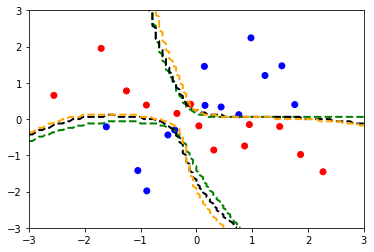

In [149]:

# compute intercept

b1 = compute_b(alpha1, sup_vector1, sup_vector_y1, gamma)
b2 = compute_b(alpha2, sup_vector2, sup_vector_y2, gamma)
b3 = compute_b(alpha3, sup_vector3, sup_vector_y3, gamma)

# prediction 
y_prediction1 =  prediction(X,alpha1,sup_vector_y1,sup_vector1,b1)
print('Predicted Label: \n', y_prediction1)
y_prediction2 =  prediction(X,alpha2,sup_vector_y2,sup_vector2,b2)
print('Predicted Label: \n', y_prediction2)
y_prediction3 =  prediction(X,alpha3,sup_vector_y3,sup_vector3,b3)
print('Predicted Label: \n', y_prediction3)

# prepare to plot contour
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_pred = np.c_[xx.ravel(), yy.ravel()]
Z1 = prediction(X_pred,alpha1,sup_vector_y1,sup_vector1,b1)
Z1 = Z1.reshape(xx.shape)
Z2 = prediction(X_pred,alpha2,sup_vector_y2,sup_vector2,b2)
Z2 = Z2.reshape(xx.shape)
Z3 = prediction(X_pred,alpha3,sup_vector_y3,sup_vector3,b3)
Z3 = Z3.reshape(xx.shape)

contours = plt.contour(xx, yy, Z1, levels=[0], colors = ['green'] ,linewidths=2, linestyles='dashed' )
contours2 = plt.contour(xx, yy, Z2, levels=[0], colors = ['black'] ,linewidths=2, linestyles='dashed' )
contours3 = plt.contour(xx, yy, Z3, levels=[0], colors = ['orange'] ,linewidths=2, linestyles='dashed' )

# plot data in 2D
colors = np.where(y==1, 'r', 'b')
plt.scatter(X[:,0], X[:,1], c = colors)
plt.show()

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1  1]
SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1  1]
SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1  1]


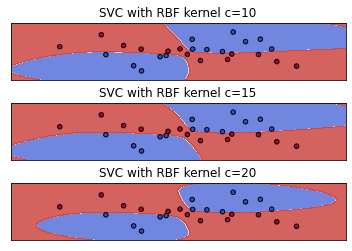

In [150]:

###### using existed function in sklearn ############
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C1 = 10  # SVM regularization parameter
C2 = 15  # SVM regularization parameter
C3 = 20  # SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=0.5, C=C1),
          svm.SVC(kernel='rbf', gamma=0.5, C=C2),
         svm.SVC(kernel='rbf', gamma=0.5, C=C3))
models = (clf.fit(X, y) for clf in models)



# title for the plots
titles = ('SVC with RBF kernel c=10',
          'SVC with RBF kernel c=15',
          'SVC with RBF kernel c=20')

# Set-up grid for plotting.
fig, sub = plt.subplots(3, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    print(clf)
    print(clf.predict(X))
plt.show()



In [151]:

# Kernel definition polynomial

def kernel(x, y, degree): 
	return np.power((np.dot(x,y) + 1), degree)

# Gamma Matrix computation

def gam_matrix(data, degree,kernel):
	nr_data = data.shape[0]
	gam_matrix = np.array([kernel(data[i], data[j], degree) \
				               	   for i in range(nr_data) \
					               for j in range(nr_data)]) \
					               .reshape(nr_data,nr_data)
	return gam_matrix

# optimization SVM problems

def optmization_cv(data, degree, kernel, gam_matrix, constantVal):
	# Quadratic of objective function part
	nr_data = data.shape[0] 
	P = np.outer(y,y)*gam_matrix(data, degree,kernel)

	q = -1*np.ones(nr_data)

    # Constraints part
	G = -1*np.eye(nr_data, nr_data)
	N = np.eye(nr_data, nr_data)
	h = np.zeros(nr_data)
	k = constantVal*np.ones(nr_data)
   
	A = np.ones(nr_data)*y
	b = 0.0

	# Define and solve the CVXPY problem.
	x = cp.Variable(nr_data)
	problem = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T@x),
                 [G@x <= h,
				  N@x <= k,
                  A@x == b])
	problem.solve()

	print("The optimal value is: ", problem.value)
	print("A solution multipliers are: \n", x.value)

	# multipliers of dua-form SVM optimization 
	alpha = x.value
	alpha_positive = alpha[alpha>1.0e-8]
	support_vector = X[alpha>1.0e-8]
	support_vector_Y = y[alpha>1.0e-8]
	return alpha_positive, support_vector, support_vector_Y

# compute intercept

def compute_b(alfa, sup_x, sup_y, degree):
	# retrieve multipliers (alpha)
	# support vector x
	# support vector y	
	intercept=0.0
	for I_X_DO in range(len(sup_x)):
		dummy = np.sum( (alfa[j]*sup_y[j]*kernel(sup_x[j], sup_x[I_X_DO], degree)) \
									for j in range(len(sup_x)) )
		dummy = sup_y[I_X_DO] - dummy
		intercept += dummy
	intercept = intercept/len(sup_x)
	return intercept


# Compute the accuracy of all training samples

def prediction(data,alpha,sup_vector_y,sup_vector,b,degree):
	y_pred=np.zeros(data.shape[0])
	for I_X_DO in range(data.shape[0]):
		y_pred[I_X_DO]=np.sign(np.sum(( alpha[j]*sup_vector_y[j]\
						                *kernel(sup_vector[j],data[I_X_DO],degree) \
							            for j in range(len(sup_vector)) )) + b)
	return y_pred


Actual Label: 
 [ 1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1
 -1  1 -1 -1  1 -1]
Actual Label: 
 [ 1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1
 -1  1 -1 -1  1 -1]
The optimal value is:  -7.758385083654453
A solution multipliers are: 
 [-2.29489615e-23  9.88194075e-23  1.01459149e-22 -1.52869870e-22
  5.03043956e-02 -1.45828105e-22  8.32758202e-24  1.00000000e+00
  1.00000000e+00  8.50036412e-24  1.00000000e+00  1.00000000e+00
  1.43062691e-22  8.76220915e-24  4.65093771e-01  2.85236484e-02
 -7.78391867e-23  8.57846257e-01  5.98231928e-01 -3.71031791e-25
 -2.90465036e-22  6.39014602e-24  1.75091424e-23  1.00000000e+00
  1.00000000e+00  2.78523086e-23  5.32528605e-23  1.00000000e+00
  1.00000000e+00 -9.54767802e-23]
The optimal value is:  -10.052522718259915
A solution multipliers are: 
 [-1.64979808e-22 -1.00111196e-22 -4.80701963e-22 -2.80245798e-22
  7.81446131e-02 -1.41377871e-22 -4.46749012e-23  1.50000000e+00
  1.50000000e+00 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


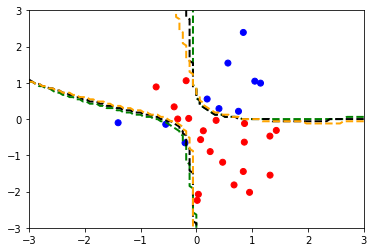

In [152]:

# Constant value
constant_value1=1
constant_value2=1.5
constant_value3=2

degree = 3


# Data input

np.random.seed(0)
X, y = dataset(30)
print('Actual Label: \n', y)

# support vectors x, y and multipliers
alpha1, sup_vector1, sup_vector_y1 = optmization_cv(X, degree, kernel, gam_matrix, constant_value1)
alpha2, sup_vector2, sup_vector_y2 = optmization_cv(X, degree, kernel, gam_matrix, constant_value2)
alpha3, sup_vector3, sup_vector_y3 = optmization_cv(X, degree, kernel, gam_matrix, constant_value3)


# compute intercept
b1 = compute_b(alpha1, sup_vector1, sup_vector_y1, degree)
b2 = compute_b(alpha2, sup_vector2, sup_vector_y2, degree)
b3 = compute_b(alpha3, sup_vector3, sup_vector_y3, degree)

# prediction 
y_prediction1 =  prediction(X,alpha1,sup_vector_y1,sup_vector1,b1,degree)
print('Predicted Label: \n', y_prediction1)
y_prediction2 =  prediction(X,alpha2,sup_vector_y2,sup_vector2,b2,degree)
print('Predicted Label: \n', y_prediction2)
y_prediction3 =  prediction(X,alpha3,sup_vector_y3,sup_vector3,b3,degree)
print('Predicted Label: \n', y_prediction3)

# prepare to plot contour
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_pred = np.c_[xx.ravel(), yy.ravel()]
Z1 = prediction(X_pred,alpha1,sup_vector_y1,sup_vector1,b1,degree)
Z1 = Z1.reshape(xx.shape)
Z2 = prediction(X_pred,alpha2,sup_vector_y2,sup_vector2,b2,degree)
Z2 = Z2.reshape(xx.shape)
Z3 = prediction(X_pred,alpha3,sup_vector_y3,sup_vector3,b3,degree)
Z3 = Z3.reshape(xx.shape)

contours = plt.contour(xx, yy, Z1, levels=[0], colors = ['green'] ,linewidths=2, linestyles='dashed' )
contours2 = plt.contour(xx, yy, Z2, levels=[0], colors = ['black'] ,linewidths=2, linestyles='dashed' )
contours3 = plt.contour(xx, yy, Z3, levels=[0], colors = ['orange'] ,linewidths=2, linestyles='dashed' )

# plot data in 2D
colors = np.where(y==1, 'r', 'b')
plt.scatter(X[:,0], X[:,1], c = colors)
plt.show()

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1 -1  1  1 -1]
SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1 -1  1  1 -1]
SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1

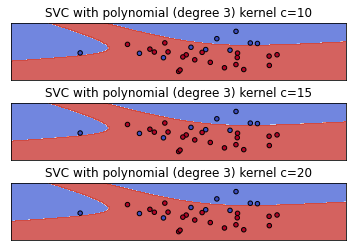

In [164]:
###### using existed function in sklearn ############

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C1 = 10  # SVM regularization parameter
C2 = 15  # SVM regularization parameter
C3 = 20  # SVM regularization parameter


models = (svm.SVC(kernel='poly', degree=3, gamma=0.5, C=C1),
          svm.SVC(kernel='poly', degree=3, gamma=0.5, C=C2),
          svm.SVC(kernel='poly', degree=3, gamma=0.5, C=C3))
models = (clf.fit(X, y) for clf in models)



# title for the plots
titles = ('SVC with polynomial (degree 3) kernel c=10',
          'SVC with polynomial (degree 3) kernel c=15',
          'SVC with polynomial (degree 3) kernel c=20')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(3, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    print(clf)
    print(clf.predict(X))
plt.show()

